In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

import requests
import urllib3

pd.set_option('display.max_columns', None)

/Users/willemhouck/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "112087",
    'client_secret': '734911cf5c35b38944e53de86bc7102a959a827a',
    'refresh_token': 'e7455dac5580f04a6b284a8c9441cd0de7865fa9',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

Requesting Token...

Access Token = ab6571cb1cfc0e653b012e7208078d05d7918efc



In [6]:
all_activities = pd.DataFrame(my_dataset)
all_activities.distance = np.round(all_activities.distance/1000, 2)
all_activities.average_speed = 16.66666/all_activities.average_speed
all_activities.moving_time = all_activities.moving_time/3600
all_activities.elapsed_time = all_activities.elapsed_time/3600
all_activities.start_date = pd.to_datetime(all_activities.start_date)


runs = all_activities[all_activities.type == "Run"]

<Axes: xlabel='average_speed', ylabel='average_heartrate'>

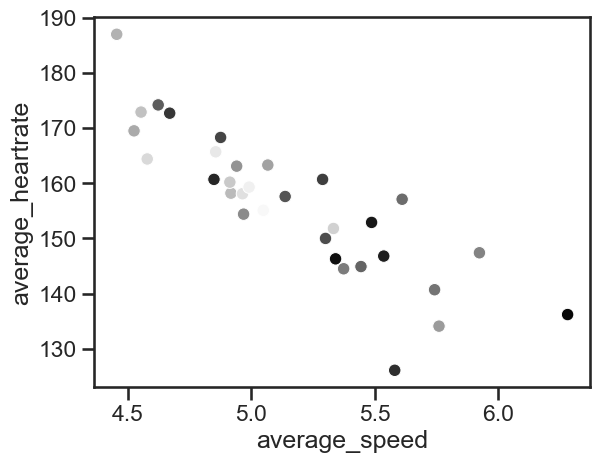

In [7]:
# barplot with weekly km's


sns.set(style="ticks", context="talk")
# sns.regplot(x='distance', y = 'average_speed', data = runs).set_title("Average Speed vs Distance")
sns.scatterplot(x="average_speed", y="average_heartrate", hue="start_date", data = runs[runs.has_heartrate], palette = "gist_gray", legend=False)
# sns.scatterplot(x="start_date", y="average_heartrate", hue="average_speed", data = runs[runs.has_heartrate], palette = "gist_gray", legend=False)

<Axes: xlabel='start_date', ylabel='distance'>

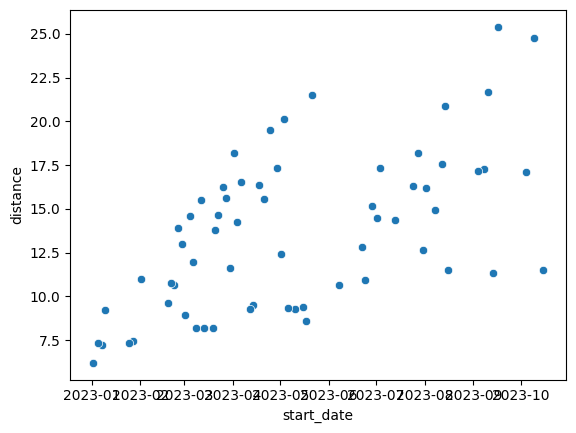

In [4]:
sns.scatterplot(x="start_date", y="distance", data=runs[runs.start_date.dt.year > 2022])

In [7]:
all_activities[(all_activities['start_date'] > "2023-01-01") & (all_activities['start_date'] < "2024-01-01")].distance.sum()


1725.2599999999998

In [10]:
all_activities[all_activities['start_date'] > "2024-01-10"].distance.sum()

499.19000000000005